In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9230769230769231)

In [5]:
model.feature_importances_

array([0.        , 0.0393304 , 0.        , 0.        , 0.00891967,
       0.        , 0.        , 0.01170706, 0.        , 0.        ,
       0.00995684, 0.        , 0.00980366, 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.00401385, 0.        ,
       0.        , 0.02958161, 0.72534081, 0.03687207, 0.00931787,
       0.        , 0.        , 0.10516335, 0.        , 0.        ])

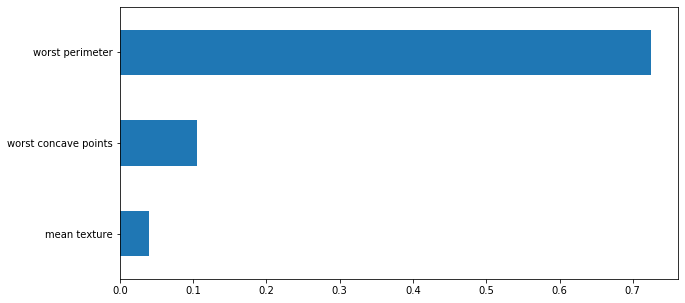

In [6]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=True).tail(3).plot(kind='barh', figsize=(10, 5))

In [7]:
fi[fi!=0].sort_values(ascending=False)

worst perimeter         0.725341
worst concave points    0.105163
mean texture            0.039330
worst area              0.036872
worst texture           0.029582
mean concave points     0.011707
area error              0.009993
radius error            0.009957
perimeter error         0.009804
worst smoothness        0.009318
mean smoothness         0.008920
symmetry error          0.004014
dtype: float64

In [8]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model3.score(x_train, y_train), model3.score(x_test, y_test)

(0.9765258215962441, 0.916083916083916)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(1.0, 0.9020979020979021)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(model3,  out_file='model3.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

In [ ]:
!pip install graphviz

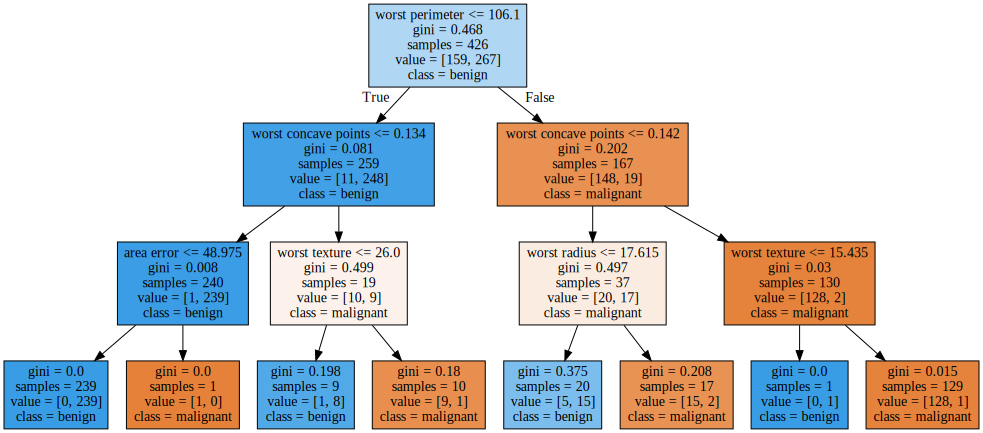

In [11]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

In [12]:
export_graphviz(model5,  out_file='model5.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

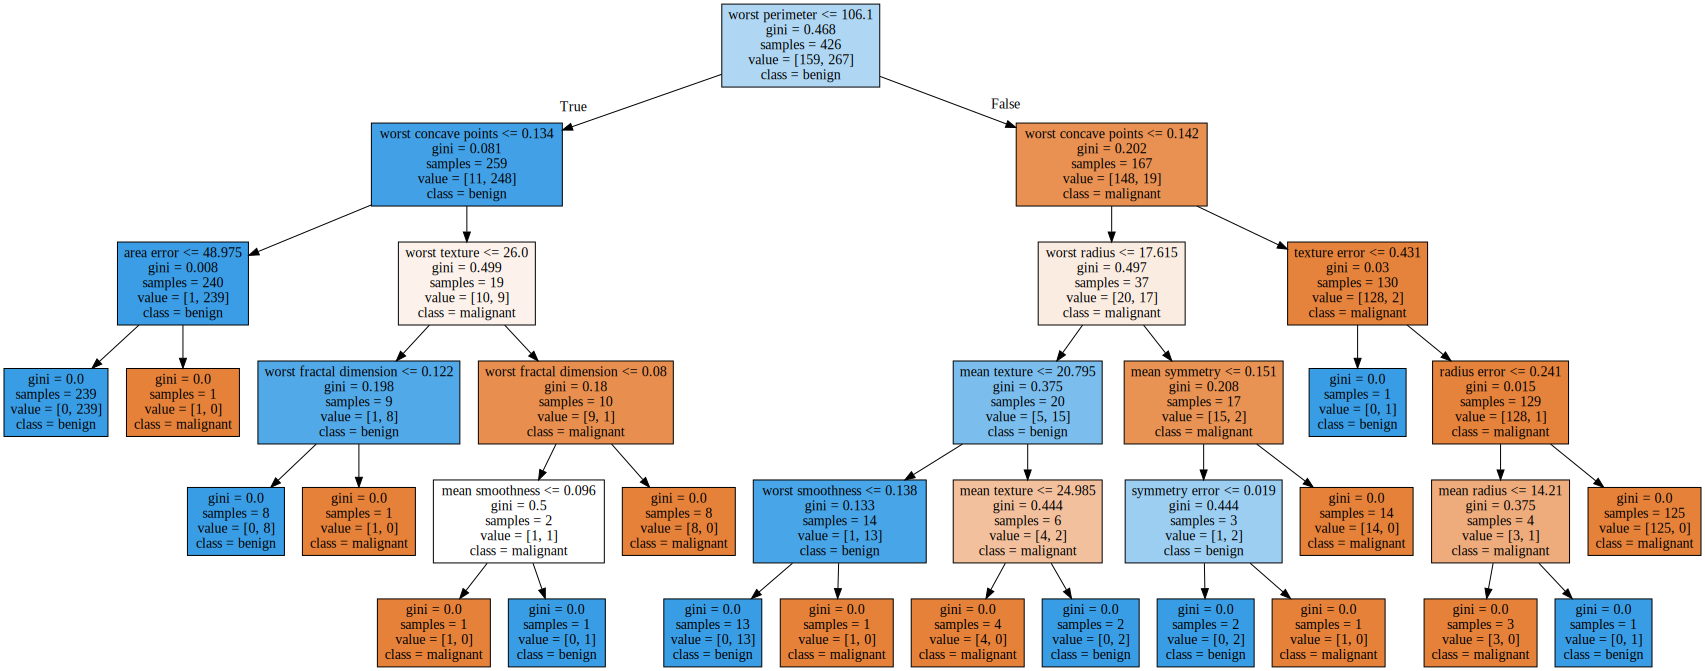

In [13]:
with open('model5.dot') as f:
    data = f.read()
graphviz.Source(data)

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)

In [15]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6528066564985238)

In [16]:
model.feature_importances_

array([5.56015034e-02, 4.22695025e-04, 1.12889109e-02, 1.54646407e-07,
       1.58907427e-02, 2.43290083e-01, 5.77932484e-03, 2.78483712e-02,
       3.94966924e-04, 1.46564710e-02, 3.06717477e-02, 6.53342310e-03,
       5.87621606e-01])

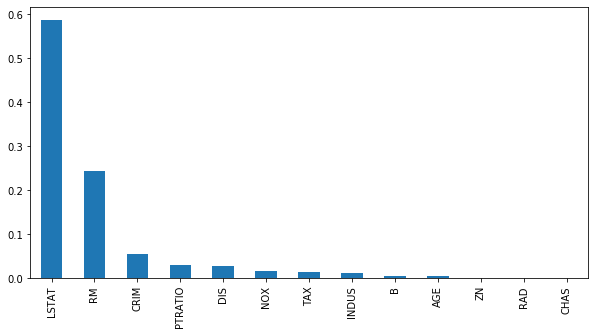

In [17]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [18]:
fi[fi!=0].sort_values(ascending=False)

LSTAT      5.876216e-01
RM         2.432901e-01
CRIM       5.560150e-02
PTRATIO    3.067175e-02
DIS        2.784837e-02
NOX        1.589074e-02
TAX        1.465647e-02
INDUS      1.128891e-02
B          6.533423e-03
AGE        5.779325e-03
ZN         4.226950e-04
RAD        3.949669e-04
CHAS       1.546464e-07
dtype: float64

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                feature_names=boston['feature_names'],
                impurity=True, filled=True)

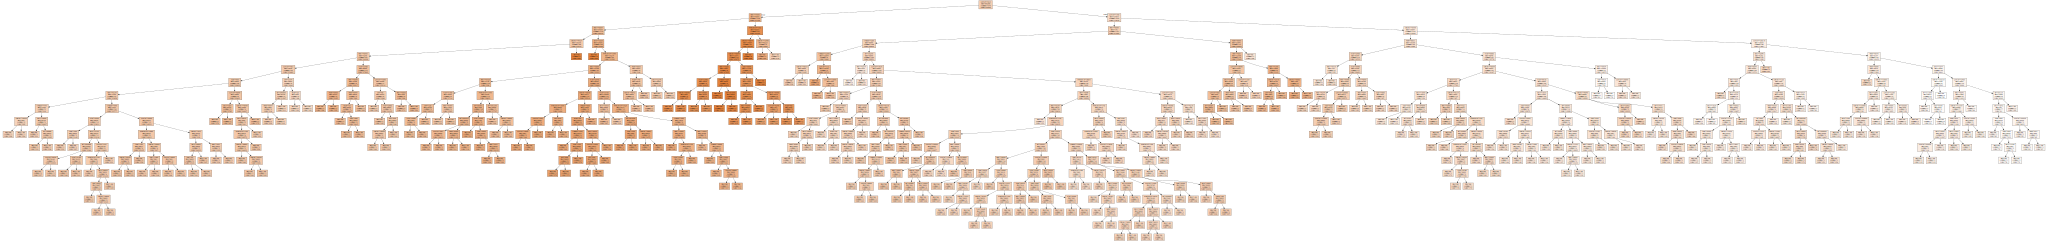

In [20]:
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)